In [1]:
from math import e, factorial,log, gamma, sqrt, floor
from matplotlib import pyplot as pt
from datetime import datetime

In [2]:
def exp_dif(lam, maxK,start=0):
    return [lam*(e**(-lam*k)) for k in range(start, maxK)]

In [3]:
f1 = open("r4-d1-result.txt")
raw1 = f1.read()
f1.close()
f2 = open("r4-d2-result.txt")
raw2 = f2.read()
f2.close()
f3 = open("sent-res-0.txt")
mod_sent = f3.readlines()
f3.close()

In [4]:
      
ToA = []    

for i in range(len(raw1)):
    if raw1[i] == 'B':# and raw2[i]=='S':
        ToA.append(i)

dif = []
for j in range(1,len(ToA)):
    dif.append(ToA[j]-ToA[j-1])

dist = {}

for d in dif:
    try:
        dist[d] += 1
    except:
        dist[d] = 1

x = sorted(dist.keys())
y = []
for t in x:
    y.append(dist[t]/len(ToA))

print(max(dist.values()))

print(y)
print(x)



2222549
[0.6667515649941697, 0.22188702882553213, 0.07439703437842274, 0.02465981420166023, 0.008208138299675496, 0.0027449459245652862, 0.000904182187610904, 0.0003110938714507324, 9.179819157562596e-05, 3.119938537210817e-05, 8.399834523259892e-06, 3.299934991280672e-06, 1.1999763604656989e-06]
[30, 90, 150, 210, 270, 330, 390, 450, 510, 570, 630, 690, 750]


In [5]:
ToA_mod = []

for line in mod_sent:
    l_clean = line.replace('(','').replace(')','').replace("'",'')
    ls = l_clean.split(',')
    T = datetime.strptime(ls[0],"%H:%M:%S.%f")
    ToA_mod.append(T)

dif_mod = []

for i in range(1,len(ToA_mod)):
    dT = ToA_mod[i] - ToA_mod[i-1]
    dif_mod.append(dT.total_seconds()*1000)



(array([1.20385735e-02, 4.00629478e-03, 1.34328019e-03, 4.45246779e-04,
       1.48202542e-04, 4.95615385e-05, 1.63255166e-05, 5.61697436e-06,
       1.65746785e-06, 5.63322405e-07, 1.51663724e-07, 5.95821774e-08,
       2.16662463e-08]), array([ 30.        ,  85.38461538, 140.76923077, 196.15384615,
       251.53846154, 306.92307692, 362.30769231, 417.69230769,
       473.07692308, 528.46153846, 583.84615385, 639.23076923,
       694.61538462, 750.        ]), <a list of 13 Patch objects>)


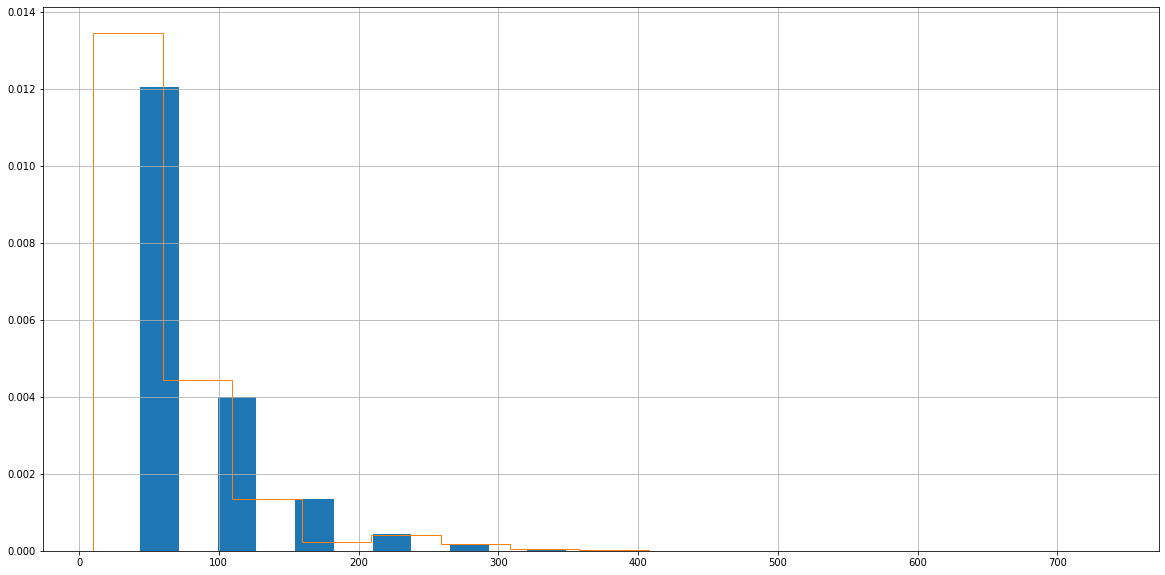

In [6]:
pt.rcParams["figure.figsize"] = (20,10)
h = pt.hist(dif,bins=13,density=True,histtype='bar',align='mid', rwidth=0.5)
print(h)
h_mod = pt.hist(dif_mod,bins=13,density=True,histtype='step',align='mid')
pt.grid(True)

pt.show()

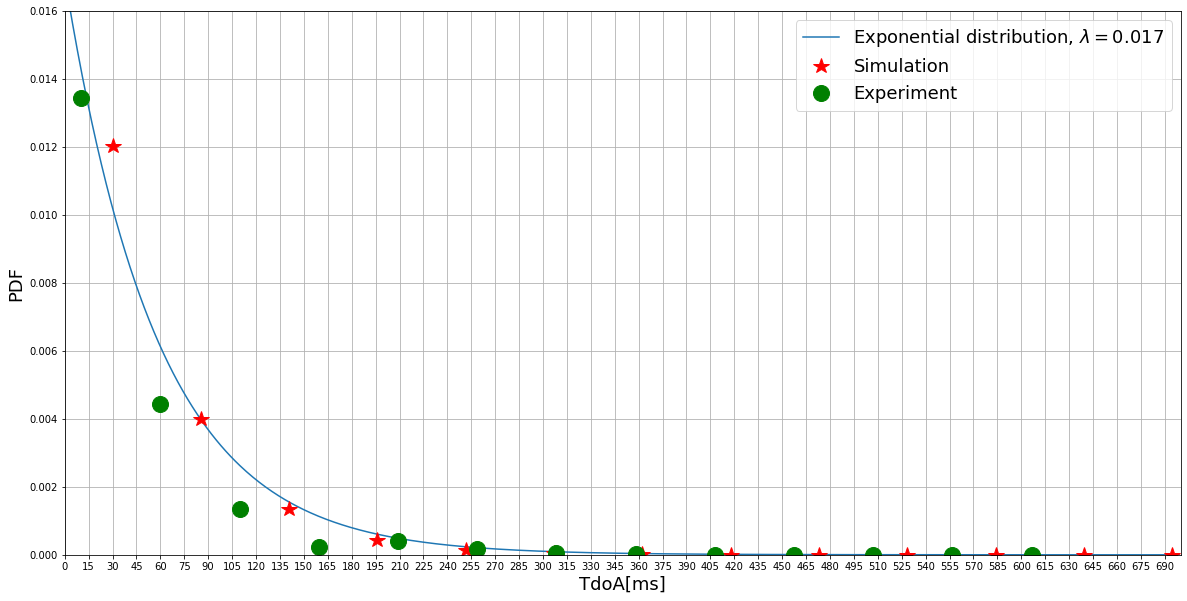

In [14]:
v = exp_dif(0.017,700,start=0)
pt.plot(range(0,700),v,markersize=16,label="Exponential distribution, $\lambda={}$".format(v[0]))
pt.plot(h[1][0:13],h[0][0:13],'r*',markersize=16, label="Simulation")
pt.plot(h_mod[1][0:13],h_mod[0][0:13],'go',markersize=16, label="Experiment")
pt.xlabel(r'TdoA[ms]', fontsize = 18)
pt.ylabel(r'PDF', fontsize = 18)
pt.axis([0,700,0,0.016])
pt.xticks(range(0,700,15))
pt.grid(True)
pt.legend(fontsize=18)
pt.savefig('toa.pdf',format='pdf',dpi=300, bbox_inches='tight')
pt.show()

In [ ]:
with open('dist.txt','w') as f:
    for p in x:
        f.write(str(p)+'\t')
    f.write('\n')

    for p in y:
        f.write(str(p)+'\t')